## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# load packages
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
%matplotlib inline 

In [2]:
# styling
#print(plt.style.available)
plt.style.use('fivethirtyeight')

## Let start by taking a quick look at our data. 

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Q1. Is the distribution of body temperatures normal?

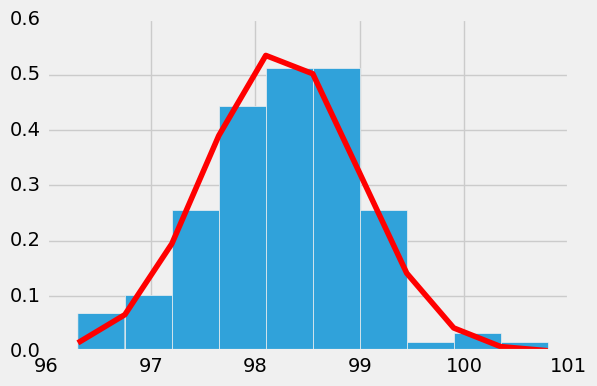

In [4]:
# plot histogram
counts, bins, plot = plt.hist(df.temperature, 10, normed=1)

# plot curve
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')

The data is fairly well approximated by a bell curve in my opinion. 

## Q2. Is the true population mean really 98.6 degrees F?

H0 = The true population mean is 98.6 degrees F  
H1 = The true population mean isn't 98.6 degrees F

In [5]:
def normalize(x, mean, std, n):
    y = (x - mean) / (std / np.sqrt(n)) # sampling distribution of means! std/sqrt(n) is standard error
    return y

In [6]:
n = len(df.index)

In [7]:
print("Our sample mean is " + str(round(mu,2)))
print("Our sample standard deviation is " + str(round(sigma,2)))
print("Our sample size is " + str(round(n,2)))
print("Given that our sample size is significantly greater than 30, the z test seems most appropriate")

Our sample mean is 98.25
Our sample standard deviation is 0.73
Our sample size is 130
Given that our sample size is significantly greater than 30, the z test seems most appropriate


In [8]:
a = normalize(98.6, mu, sigma, n) # normalize 98.6

In [9]:
print(98.6, "normalized is " + str(round(a,2)))
print("This is to say that 98.6 degrees F lies", str(round(a,2)), "standard deviations away from the mean")

98.6 normalized is 5.48
This is to say that 98.6 degrees F lies 5.48 standard deviations away from the mean


In [10]:
p_value = norm.sf(abs(a)) # one-sided

In [11]:
print("This corresponds to a p value of ", str(round(p_value, 10)))
print("This is to say that the probability of getting 98.6 degrees Fahrenheit as a random result is miniscule")
print("On this basis, I am able to reject the null hypothesis")

This corresponds to a p value of  2.18e-08
This is to say that the probability of getting 98.6 degrees Fahrenheit as a random result is miniscule
On this basis, I am able to reject the null hypothesis


## Q3. At what temperature should we consider someone's temperature to be "abnormal"?

In [12]:
std_error = sigma / np.sqrt(n) # calculate margin of error in our estimate of the mean

In [13]:
print("Our confidednce interval suggest that normal body temperature should be between " + 
      str(round(mu - std_error, 2)) + 
      " & " + 
      str(round(mu + std_error, 2)))
print("Therefore, anything outside this range should be considered abnormal")

Our confidednce interval suggest that normal body temperature should be between 98.19 & 98.31
Therefore, anything outside this range should be considered abnormal


## Q4. Is there a significant difference between males and females in normal temperature?

H0 = There is no difference between male and female temperatures  
H1 = There is a difference between male and female temperatures  

We will assume H0 is true if the probabilty of getting our diff_mean is below 5%

In [14]:
# male summary statistics
m = df[df.gender == "M"]

m_mean = m.temperature.mean()
m_std = m.temperature.std()
m_n = len(m.temperature)

m_std_error = m_std / np.sqrt(m_n)

m.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [15]:
# female summary statistics
f = df[df.gender == "F"]

f_mean = f.temperature.mean()
f_std = f.temperature.std()
f_n = len(f.temperature)

f_std_error = f_std / np.sqrt(f_n)

f.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [16]:
# difference in means
diff_mean = m_mean - f_mean
diff_mean

-0.289230769230727

In [17]:
# standard error
diff_std_error = np.sqrt(m_std**2/m_n + f_std**2/f_n)
diff_std_error

0.12655395041982642

In [18]:
# z statistic
diff_z = (diff_mean - 0) / diff_std_error
diff_z

-2.2854345381652741

In [19]:
p_value = 2*(1 - norm.cdf(abs(diff_z))) # two sided z test
p_value

0.022287360760677277

Since the p vale is below 5%, we can reject our null hypothesis.  
Therefore, there does exist a statistically significant difference between male and female normal temperatures. 

## FOR EXTRA CREDIT XD

This is a formula for computing everything in one go. 

In [20]:
def two_sample_z_test(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    
    return round(z, 3), round(pval, 4)